In [1]:
#import needed libraries
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

#makes sure that pandas shows all columns
pd.set_option('display.max_columns', None)

#download file into dataframe

filename = 'support2.csv'
df = pd.read_csv(filename)

#cleans csv file from extra spaces in the colum and rows data
#df.columns = df.columns.str.strip()
#df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

df.shape

(9105, 47)

Dataset has 47 columns, 46 potential features

In [2]:
df.head()

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,sps,aps,surv2m,surv6m,hday,diabetes,dementia,ca,prg2m,prg6m,dnr,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11.0,$11-$25k,0.0,9715.0,NaN,NaN,7.000000,other,33.898438,20.0,0.262939,0.036995,1,0,0,metastatic,0.50,0.25,no dnr,5.0,97.0,6.000000,69.0,22.0,36.00000,388.00000,1.799805,0.199982,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.0
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,44.0,34496.0,NaN,NaN,29.000000,white,52.695312,74.0,0.001000,0.000000,3,0,0,no,0.00,0.00,NaN,NaN,43.0,17.097656,112.0,34.0,34.59375,98.00000,NaN,NaN,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.0,41094.0,NaN,NaN,13.000000,white,20.500000,45.0,0.790894,0.664917,4,0,0,no,0.75,0.50,no dnr,17.0,70.0,8.500000,88.0,28.0,37.39844,231.65625,NaN,2.199707,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11.0,under $11k,0.0,3075.0,NaN,NaN,7.000000,white,20.097656,19.0,0.698975,0.411987,1,0,0,metastatic,0.90,0.50,no dnr,3.0,75.0,9.099609,88.0,32.0,35.00000,NaN,NaN,NaN,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,26.0,50127.0,NaN,NaN,18.666656,white,23.500000,30.0,0.634888,0.532959,3,0,0,no,0.90,0.90,no dnr,16.0,59.0,13.500000,112.0,20.0,37.89844,173.31250,NaN,NaN,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0


In [3]:
df.describe(include = 'all')


,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,sps,aps,surv2m,surv6m,hday,diabetes,dementia,ca,prg2m,prg6m,dnr,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
count,9105.000000,9105.000000,9105,9105.000000,9105.000000,9105.000000,9105,9105,9105.000000,7471.000000,6123,9104.000000,8.933000e+03,8217.000000,5630.000000,9023.000000,9063,9104.000000,9104.000000,9104.000000,9104.000000,9105.000000,9105.000000,9105.000000,9105,7456.000000,7472.000000,9075,9075.000000,9104.000000,8893.000000,9104.000000,9104.000000,9104.000000,6780.000000,5733.000000,6504.000000,9038.000000,9104.000000,6821.000000,4605.000000,4753.000000,4243.000000,3464.000000,6238.000000,7705,9105.000000
unique,NaN,NaN,2,NaN,NaN,NaN,8,4,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,male,NaN,NaN,NaN,ARF/MOSF w/Sepsis,ARF/MOSF,NaN,NaN,under $11k,NaN,NaN,NaN,NaN,NaN,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,no dnr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<2 mo. follow-up,NaN
freq,NaN,NaN,5125,NaN,NaN,NaN,3515,4227,NaN,NaN,2855,NaN,NaN,NaN,NaN,NaN,7191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5995,NaN,NaN,5880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3123,NaN
mean,62.650823,0.681054,NaN,0.259198,17.863042,478.449863,NaN,NaN,1.868644,11.747691,NaN,12.058546,5.999579e+04,30825.867768,28828.877838,22.610928,NaN,25.525872,37.597979,0.635870,0.520096,4.400000,0.195277,0.032510,NaN,0.618769,0.499679,NaN,14.582590,84.546408,12.347677,97.156711,23.330294,37.103341,239.529070,2.950520,2.554463,1.770961,137.568541,7.415364,159.873398,32.349463,2191.546047,1.157910,1.637384,NaN,1.888272
std,15.593710,0.466094,NaN,0.438219,22.006440,560.383272,NaN,NaN,1.344409,3.447743,NaN,24.636694,1.026488e+05,45780.820986,43604.261932,13.233248,NaN,9.899377,19.903852,0.248175,0.253343,9.126811,0.396436,0.177359,NaN,0.298367,0.304367,NaN,19.944216,27.687692,9.266329,31.559292,9.573801,1.251796,109.665593,0.875944,5.318448,1.686041,6.029326,0.080563,88.391541,26.792288,1455.245777,1.739672,2.231358,NaN,2.003763
min,18.041990,0.000000,NaN,0.000000,3.000000,3.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000,1.169000e+03,0.000000,-102.719970,1.000000,NaN,0.199982,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,-88.000000,0.000000,0.000000,0.000000,0.000000,31.699220,12.000000,0.399963,0.099991,0.099991,110.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,52.797000,0.000000,NaN,0.000000,6.000000,26.000000,NaN,NaN,1.000000,10.000000,NaN,0.000000,9.740000e+03,5929.566400,5177.404300,12.000000,NaN,19.000000,23.000000,0.507690,0.342957,1.000000,0.000000,0.000000,NaN,0.500000,0.200000,NaN,4.000000,63.000000,7.000000,72.000000,18.000000,36.195310,155.093750,2.399902,0.500000,0.899902,134.000000,7.379883,103.000000,14.000000,1165.500000,0.000000,0.000000,NaN,0.000000
50%,64.856990,1.000000,NaN,0.000000,11.000000,233.000000,NaN,NaN,2.000000,12.000000,NaN,0.000000,2.502400e+04,14452.734400,13223.500000,19.500000,NaN,23.898438,34.000000,0.715942,0.574951,1.000000,0.000000,0.000000,NaN,0.700000,0.500000,NaN,9.000000,77.000000,10.599609,100.000000,24.000000,36.695310,224.000000,2.899902,0.899902,1.199951,137.000000,7.419922,135.000000,23.000000,1968.000000,0.000000,1.000000,NaN,1.000000
75%,73.998960,1.000000,NaN,1.000000,20.000000,761.000000,NaN,NaN,3.000000,14.000000,NaN,9.000000,6.459800e+04,36087.937500,34223.601600,31.666656,NaN,30.199219,49.000000,0.825928,0.725952,3.000000,0.000000,0.000000,NaN,0.900000,0.750000,NaN,17.000000,107.000000,15.298828,120.000000,28.000000,38.195310,304.750000,3.599609,1.899902,1.899902,141.000000,7.469727,188.000000,42.000000,3000.000000,2.000000,3.000000,NaN,3.000000


In [4]:
summary = df.describe(include='all')

count_values = summary.loc['count']


"""columns where percent of missing values is more then 50%"""

#find a trashhold of 50%
half_rows = len(df)/2

columns_big_null_amount = count_values[count_values < half_rows ].index.tolist()
columns_big_null_amount


['urine', 'adlp']

Should check if columns 'urine' and 'adlp' have a big cirrelation to labels
'adlp' is Index of Activities of Daily Living (ADL) filled byt the patient, there also 'adlp' that doesn't have as much missing values, also means Index of Activities of Daily Living (ADL) but filled by surrogate (family member)

In [5]:

#find columns that are not in number
columns_not_dig = df.select_dtypes(include='object')
columns_not_dig


,sex,dzgroup,dzclass,income,race,ca,dnr,sfdm2
1,male,Lung Cancer,Cancer,$11-$25k,other,metastatic,no dnr,NaN
2,female,Cirrhosis,COPD/CHF/Cirrhosis,$11-$25k,white,no,NaN,<2 mo. follow-up
3,female,Cirrhosis,COPD/CHF/Cirrhosis,under $11k,white,no,no dnr,<2 mo. follow-up
4,female,Lung Cancer,Cancer,under $11k,white,metastatic,no dnr,no(M2 and SIP pres)
5,female,ARF/MOSF w/Sepsis,ARF/MOSF,NaN,white,no,no dnr,no(M2 and SIP pres)
...,...,...,...,...,...,...,...,...
9101,male,ARF/MOSF w/Sepsis,ARF/MOSF,NaN,white,no,no dnr,NaN
9102,female,Coma,Coma,NaN,white,no,no dnr,NaN
9103,male,ARF/MOSF w/Sepsis,ARF/MOSF,NaN,white,no,no dnr,NaN
9104,male,MOSF w/Malig,ARF/MOSF,NaN,white,yes,dnr after sadm,<2 mo. follow-up


Renaming values for numbers values:
    
Sex (binary): 0 for men, 1 for women;


In [6]:
print(df.columns)

df['sex'] = df['sex'].replace({'male': 0, 'female': 1 })
df['sex'].unique() #check if worked

Index(['age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',
       'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
       'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
       'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls', 'sfdm2',
       'adlsc'],
      dtype='object')


array([0, 1])

In [7]:
def unique_values_of_object_columns(df, list_of_column_names):
    """Function check unique values of chosen columns and returns a dictionary where key is feature name, and value is list of unique values"""
    unique_values_object = {}
    for column_name in list_of_column_names:
        unique_values_object[column_name] = df[column_name].unique()
    return unique_values_object


print(unique_values_of_object_columns(df, columns_not_dig))


{'sex': array([0, 1]), 'dzgroup': array(['Lung Cancer', 'Cirrhosis', 'ARF/MOSF w/Sepsis', 'Coma', 'CHF',
       'Colon Cancer', 'COPD', 'MOSF w/Malig'], dtype=object), 'dzclass': array(['Cancer', 'COPD/CHF/Cirrhosis', 'ARF/MOSF', 'Coma'], dtype=object), 'income': array(['$11-$25k', 'under $11k', nan, '$25-$50k', '>$50k'], dtype=object), 'race': array(['other', 'white', 'black', 'hispanic', 'asian', nan], dtype=object), 'ca': array(['metastatic', 'no', 'yes'], dtype=object), 'dnr': array(['no dnr', nan, 'dnr after sadm', 'dnr before sadm'], dtype=object), 'sfdm2': array([nan, '<2 mo. follow-up', 'no(M2 and SIP pres)', 'SIP>=30',
       'adl>=4 (>=5 if sur)', 'Coma or Intub'], dtype=object)}


### Plan of action for categorical data

1. Columns dzgroup, dzclass do not have missing data anf can be hot encoded. +
2. Income columns nan values have to be resolved, and then change for order categories 1-4 where higher income equals higher number +
3. Race column - not sure. Need to check how many missing values, and maybe drop it. Also could put nan values into unknow category. +
4. CA column (Whether the patient has cancer (yes), whether it has spread out (metastatic), or if it is healthy (no).) - no missing columns, hot-encode +
5. DNR column (Whether the patient has a do not rescuscitate (DNR) order or not. Possible values are dnr after sadm, dnr before sadm, missing, no dnr.) - check what is DNR, and how many missing values
6. SFDM2 column (Level of functional disability of the patient in a 1-5 scale, with 5 being the highest severity. Values are: {1: "no(Month 2 and SIP pres)", "adl>=4 (>=5 if sur)", "SIP>=30", "Coma or Intub", 5: "<2 mo. follow-up"}. There are 159 patients surviving 2 months for whom there were no patient or surrogate interviews. These patients have missing sfdm2.)  - figure out missing data  - this column is good for ordinal regression label, but I won;t use it in this projecy - DROP +

In [8]:
columns_to_encode = [ 'dzgroup', 'dzclass', 'ca']
encoded_df = pd.get_dummies(df, columns=columns_to_encode, dtype=int)#dtype int makes sure encoded columns filled with 1&0, not True/False

df = encoded_df

In [9]:
#handling income categorical data; 2982 missing values our of 9105
#will also hot encode with additional collumn of 'unknown' income

income_values = df['income'].unique()
print(income_values)

#put income in a variable to be able drop the column later
income_column = 'income'

df[income_column] = df[income_column].fillna('unknown')

encoded_income = pd.get_dummies(df[income_column], prefix='income', dtype=int)


# Merging the encoded columns back with the original dataframe
data_encoded = df.drop(income_column, axis=1)
data_encoded = pd.concat([data_encoded, encoded_income], axis=1)

df = data_encoded

['$11-$25k' 'under $11k' nan '$25-$50k' '>$50k']


In [10]:
#handling race categorical columns
df['race'].unique()

array(['other', 'white', 'black', 'hispanic', 'asian', nan], dtype=object)

One of the labels for future prediction will be 'death'. I am conducting Chi-Square Test to see if race has a significant impact on death. If P-value is less then 0.05 then association between two variables is significant

In [11]:
# Create a contingency table
contingency_table = pd.crosstab(df['race'], df['death'])

# Conduct the Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Squared value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

Chi-Squared value: 17.960732173870024
P-value: 0.0012560965847243553
Degrees of Freedom: 4


From statistical perspective - race has an impact on the dataset. However, from ethical perspective using race as a feature will affect bias.
At this point, I'd rather drop it and focus on other columns that might have more correlation to potential labels.
Also want to drop SFDM2 column

In [12]:
column_to_drop = ['race', 'sfdm2']
df = df.drop(column_to_drop, axis=1)
df.head()

,age,death,sex,hospdead,slos,d.time,num.co,edu,scoma,charges,totcst,totmcst,avtisst,sps,aps,surv2m,surv6m,hday,diabetes,dementia,prg2m,prg6m,dnr,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc,dzgroup_ARF/MOSF w/Sepsis,dzgroup_CHF,dzgroup_COPD,dzgroup_Cirrhosis,dzgroup_Colon Cancer,dzgroup_Coma,dzgroup_Lung Cancer,dzgroup_MOSF w/Malig,dzclass_ARF/MOSF,dzclass_COPD/CHF/Cirrhosis,dzclass_Cancer,dzclass_Coma,ca_metastatic,ca_no,ca_yes,income_$11-$25k,income_$25-$50k,income_>$50k,income_under $11k,income_unknown
1,62.84998,0,0,0,5,2029,0,11.0,0.0,9715.0,NaN,NaN,7.000000,33.898438,20.0,0.262939,0.036995,1,0,0,0.50,0.25,no dnr,5.0,97.0,6.000000,69.0,22.0,36.00000,388.00000,1.799805,0.199982,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,7.0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0
2,60.33899,1,1,1,4,4,2,12.0,44.0,34496.0,NaN,NaN,29.000000,52.695312,74.0,0.001000,0.000000,3,0,0,0.00,0.00,NaN,NaN,43.0,17.097656,112.0,34.0,34.59375,98.00000,NaN,NaN,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,1.0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3,52.74698,1,1,0,17,47,2,12.0,0.0,41094.0,NaN,NaN,13.000000,20.500000,45.0,0.790894,0.664917,4,0,0,0.75,0.50,no dnr,17.0,70.0,8.500000,88.0,28.0,37.39844,231.65625,NaN,2.199707,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,42.38498,1,1,0,3,133,2,11.0,0.0,3075.0,NaN,NaN,7.000000,20.097656,19.0,0.698975,0.411987,1,0,0,0.90,0.50,no dnr,3.0,75.0,9.099609,88.0,32.0,35.00000,NaN,NaN,NaN,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0
5,79.88495,0,1,0,16,2029,1,NaN,26.0,50127.0,NaN,NaN,18.666656,23.500000,30.0,0.634888,0.532959,3,0,0,0.90,0.90,no dnr,16.0,59.0,13.500000,112.0,20.0,37.89844,173.31250,NaN,NaN,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [13]:
#handling DNR as categorical values

df['dnr'].unique()



array(['no dnr', nan, 'dnr after sadm', 'dnr before sadm'], dtype=object)

In [14]:
#checking values of dnr column
dnr_counts = df['dnr'].value_counts(dropna=False)
print(dnr_counts)

dnr
no dnr             5880
dnr after sadm     2956
dnr before sadm     239
NaN                  30
Name: count, dtype: int64


DNR after sadm, and DNR before sadm mean DNR with the difference when it was receive - after admission or before. It makes sense to unite then=m and mark ar DNR. NAN valus would be filled with NO DNR, because its a top value and would not affect much due to small amount of Nans (30 records). After that column values will be changed for binary 0 - no DNR, 1 - DNR

In [15]:
dnr_values = ['dnr after sadm', 'dnr before sadm', 'no dnr']

df['dnr'] = df['dnr'].fillna('no dnr')

df['dnr'] = df['dnr'].replace({dnr_values[0]: 1, dnr_values[1]:1, dnr_values[2]: 0} )

df['dnr'].unique()

array([0, 1])

In [16]:
df.shape

(9105, 61)

In [17]:
df['sex'].unique()

array([0, 1])

FIX CORRELATION MATRIX; find top 30 features --- handle missing values first

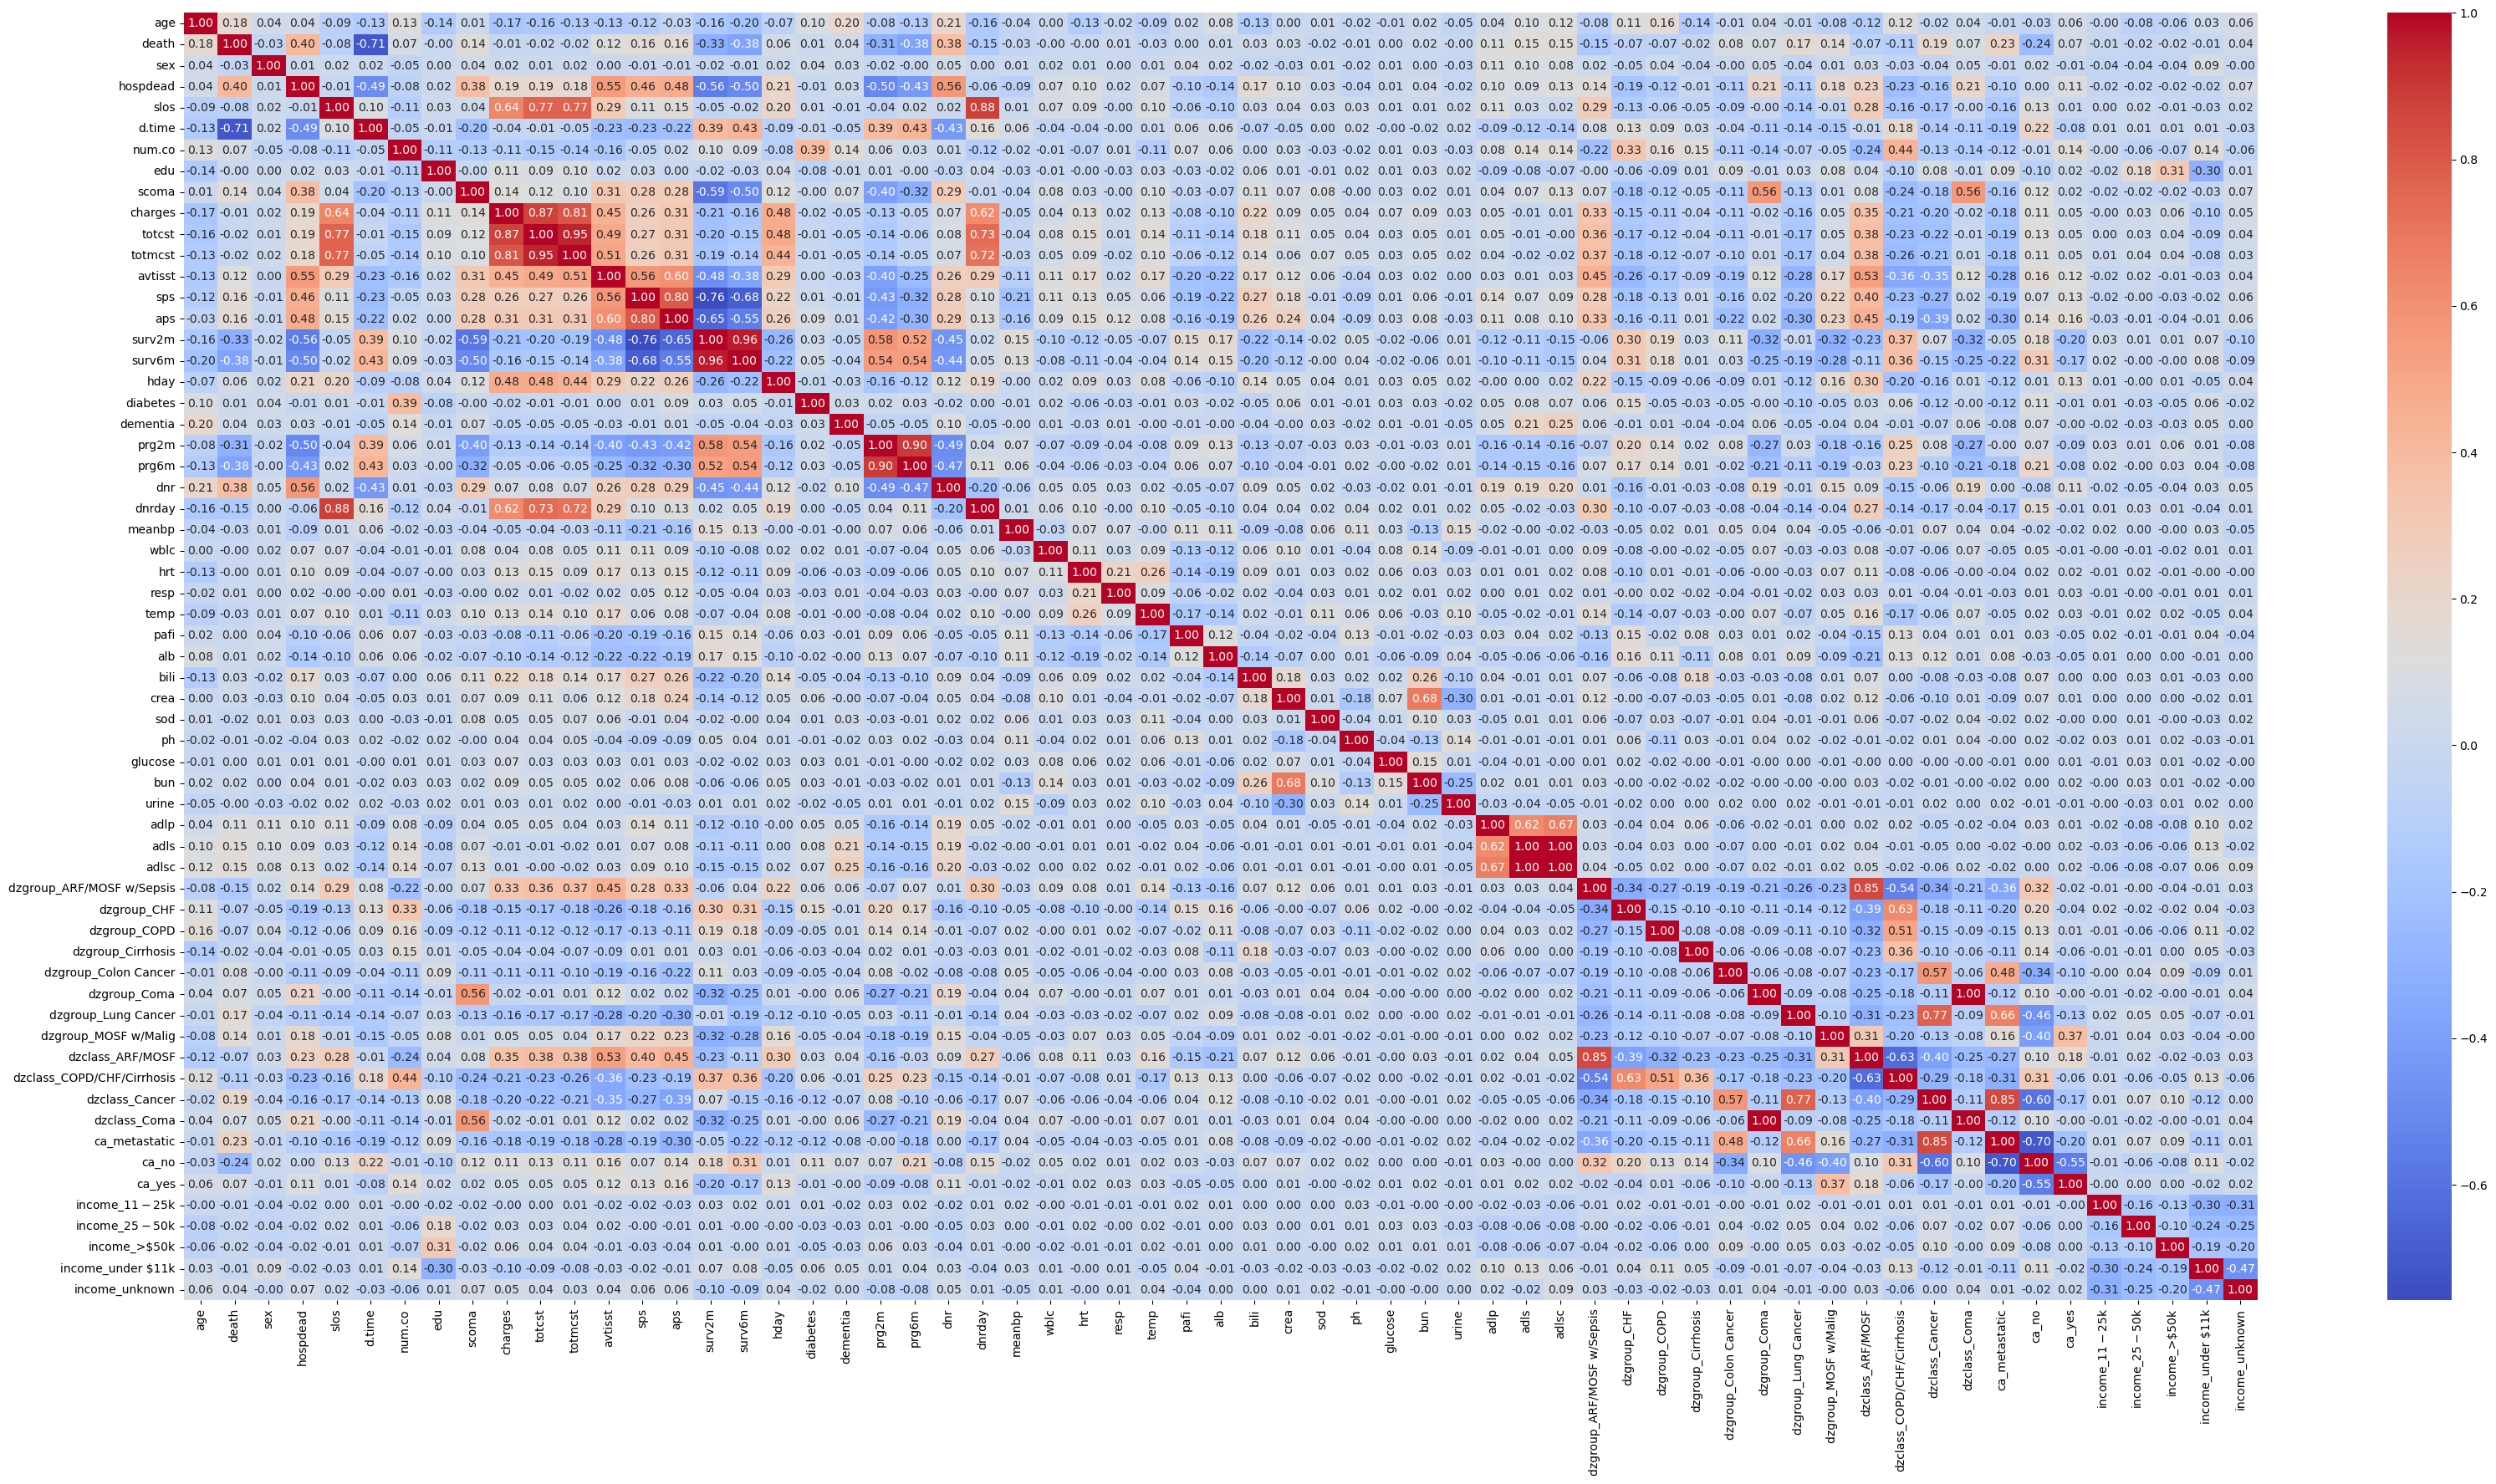

In [18]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(40, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Show the plot
plt.show()

Columns with missing values.

In [19]:
nulls =df.columns[df.isnull().any()]
nulls

Index(['edu', 'scoma', 'charges', 'totcst', 'totmcst', 'avtisst', 'sps', 'aps',
       'surv2m', 'surv6m', 'prg2m', 'prg6m', 'dnrday', 'meanbp', 'wblc', 'hrt',
       'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose',
       'bun', 'urine', 'adlp', 'adls'],
      dtype='object')

In [20]:
null_counts = df[nulls].isnull().sum()
null_counts

edu        1634
scoma         1
charges     172
totcst      888
totmcst    3475
avtisst      82
sps           1
aps           1
surv2m        1
surv6m        1
prg2m      1649
prg6m      1633
dnrday       30
meanbp        1
wblc        212
hrt           1
resp          1
temp          1
pafi       2325
alb        3372
bili       2601
crea         67
sod           1
ph         2284
glucose    4500
bun        4352
urine      4862
adlp       5641
adls       2867
dtype: int64

Rows with one missing value will be dropped.


In [21]:
#finding column names with one null value
columns_with_one_null = null_counts[null_counts ==1].index
print(f'Columns that have one null value: {columns_with_one_null}')

#finding null rows in those columns

# Initializing a dictionary to store row indices for each column
rows_with_nulls = {}

# Loop through each column and find the row index with the null value
for column in columns_with_one_null:
    null_row = df[df[column].isnull()].index
    if len(null_row) == 1:  # Ensure there's exactly one null in the column
        rows_with_nulls[column] = null_row[0]

# Now, rows_with_nulls contains column names and the specific row index of the null value
print(f'Number of a row with null: {rows_with_nulls}')


Columns that have one null value: Index(['scoma', 'sps', 'aps', 'surv2m', 'surv6m', 'meanbp', 'hrt', 'resp',
       'temp', 'sod'],
      dtype='object')
Number of a row with null: {'scoma': 5394, 'sps': 5394, 'aps': 5394, 'surv2m': 5394, 'surv6m': 5394, 'meanbp': 5441, 'hrt': 5441, 'resp': 5441, 'temp': 5441, 'sod': 5441}


Seems like only rows number 5394 & 5441 has to be dropped 

In [22]:
df = df.drop([5394,5441])


In [23]:
nulls =df.columns[df.isnull().any()]
null_counts = df[nulls].isnull().sum()
null_counts

edu        1634
charges     171
totcst      886
totmcst    3473
avtisst      81
prg2m      1648
prg6m      1632
dnrday       29
wblc        211
pafi       2323
alb        3370
bili       2599
crea         66
ph         2282
glucose    4499
bun        4351
urine      4861
adlp       5639
adls       2867
dtype: int64

For some columns there is a recommendation from HBiostat Repository (https://hbiostat.org/data/repo/supportdesc, Professor Frank Harrell) to fill null values with followoing default values.

- Serum albumin (alb)	3.5
- PaO2/FiO2 ratio (pafi) 	333.3
- Bilirubin (bili)	1.01
- Creatinine (crea)	1.01
- bun	6.51
- White blood count (wblc)	9 (thousands)
- Urine output (urine)	2502

Checked with ChatGPT if those values are within typical range and can be used for imputation.

 - Serum albumin: The normal fill-in value of 3.5 is within a typical range for serum albumin levels, which usually range from 3.4 to 5.4 g/dL. This makes it a suitable choice for imputation +
 - PaO2/FiO2 ratio (pafi): A value of 333.3 is considered within the normal range. The normal PaO2/FiO2 ratio is typically around 300 to 500, indicating good lung function. +
 - Bilirubin: The normal value of 1.01 mg/dL is within the standard reference range for bilirubin (0.1 to 1.2 mg/dL). This suggests it's a reasonable value for imputation. +
 - Creatinine: A fill-in value of 1.01 mg/dL aligns with the normal range for creatinine (0.6 to 1.2 mg/dL for males and 0.5 to 1.1 mg/dL for females).+
 - BUN (Blood Urea Nitrogen): 6.51 mg/dL is a bit low considering the typical reference range (7 to 20 mg/dL). However, it's close enough to be considered within normal limits.  - want to check the median; mean is much higher then proposed value
 - White blood count: 9 (thousands) is within the normal range for WBC count, which is usually between 4,500 and 11,000 cells per microliter. +
 - Urine output: 2502 mL/day is on the higher end but still within the normal range of urine output (800 to 2000 mL/day). It might be slightly high for general population standards, but it could be considered normal depending on the context.



 #### Should not forget to do this:
 Validation and Sensitivity Analysis - validate the performance of predictive model both with and without the imputed data. Sensitivity analyses can help determine how much the imputed values are influencing the model's predictions.

In [24]:
df[nulls].describe()

,edu,charges,totcst,totmcst,avtisst,prg2m,prg6m,dnrday,wblc,pafi,alb,bili,crea,ph,glucose,bun,urine,adlp,adls
count,7469.000000,8.932000e+03,8217.000000,5630.000000,9022.000000,7455.000000,7471.000000,9074.000000,8892.000000,6780.000000,5733.000000,6504.000000,9037.000000,6821.000000,4604.000000,4752.000000,4242.000000,3464.000000,6236.000000
mean,11.747088,5.999215e+04,30825.867768,28828.877838,22.610525,0.618744,0.499639,14.579017,12.347592,239.529070,2.950520,2.554463,1.770957,7.415364,159.851868,32.343644,2191.315388,1.157910,1.636786
std,3.447853,1.026539e+05,45780.820986,43604.261932,13.233926,0.298380,0.304368,19.942411,9.266846,109.665593,0.875944,5.318448,1.686134,0.080563,88.389064,26.792104,1455.339763,1.739672,2.230586
min,0.000000,1.169000e+03,0.000000,-102.719970,1.000000,0.000000,0.000000,-88.000000,0.000000,12.000000,0.399963,0.099991,0.099991,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000
25%,10.000000,9.738000e+03,5929.566400,5177.404300,12.000000,0.500000,0.200000,4.000000,6.974854,155.093750,2.399902,0.500000,0.899902,7.379883,103.000000,14.000000,1165.250000,0.000000,0.000000
50%,12.000000,2.501950e+04,14452.734400,13223.500000,19.500000,0.700000,0.500000,9.000000,10.599609,224.000000,2.899902,0.899902,1.199951,7.419922,135.000000,23.000000,1968.000000,0.000000,1.000000
75%,14.000000,6.458823e+04,36087.937500,34223.601600,31.666656,0.900000,0.750000,17.000000,15.298828,304.750000,3.599609,1.899902,1.899902,7.469727,188.000000,42.000000,3000.000000,2.000000,3.000000
max,31.000000,1.435423e+06,633212.000000,710682.000000,83.000000,1.000000,1.000000,285.000000,200.000000,890.375000,29.000000,63.000000,21.500000,7.769531,1092.000000,300.000000,9000.000000,7.000000,7.000000


In [25]:
#filling columns with recommended values, all except bun
df['alb'] = df['alb'].fillna(3.5)
df['pafi'] = df['pafi'].fillna(333.3)
df['bili'] = df['bili'].fillna(1.01)
df['crea'] = df['crea'].fillna(1.01)
df['wblc'] = df['wblc'].fillna(9)
df['urine'] = df['urine'].fillna(2502)

#bun 
df['bun'] = df['bun'].fillna(df['bun'].median())

In [26]:
nulls =df.columns[df.isnull().any()]
null_counts = df[nulls].isnull().sum()
null_counts

edu        1634
charges     171
totcst      886
totmcst    3473
avtisst      81
prg2m      1648
prg6m      1632
dnrday       29
ph         2282
glucose    4499
adlp       5639
adls       2867
dtype: int64

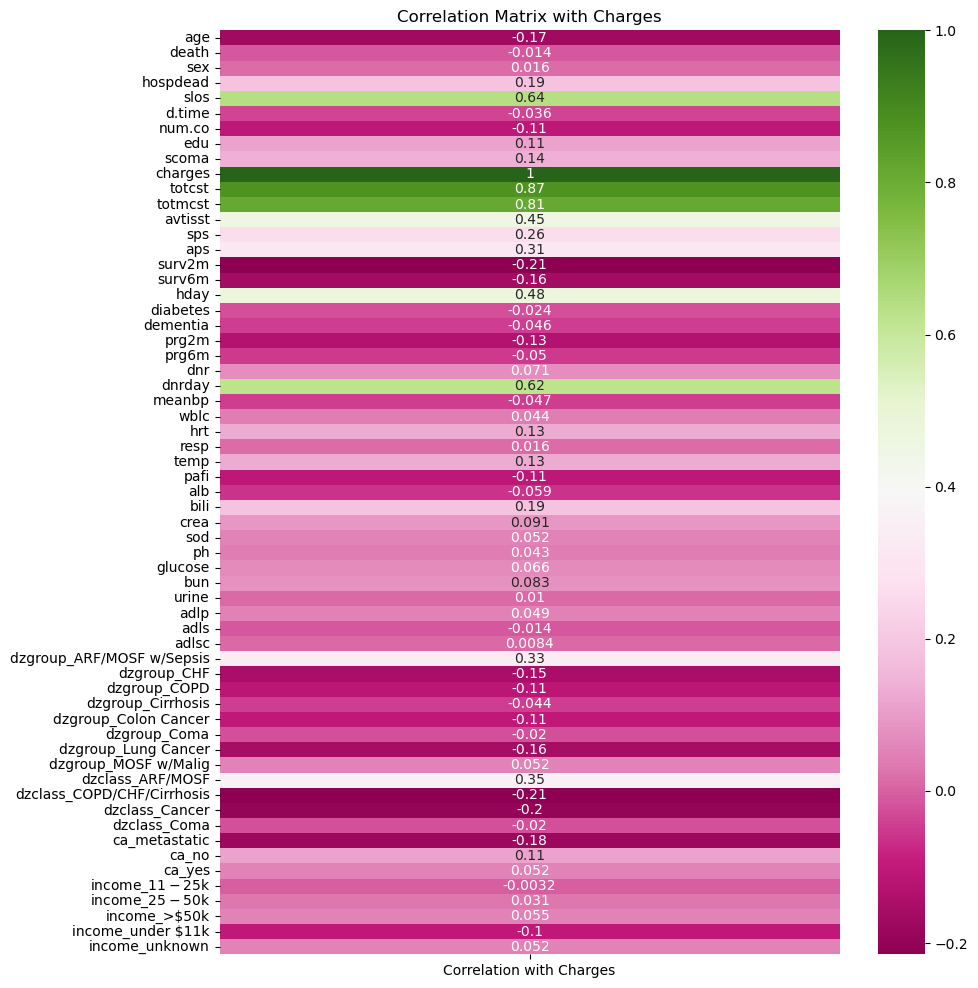

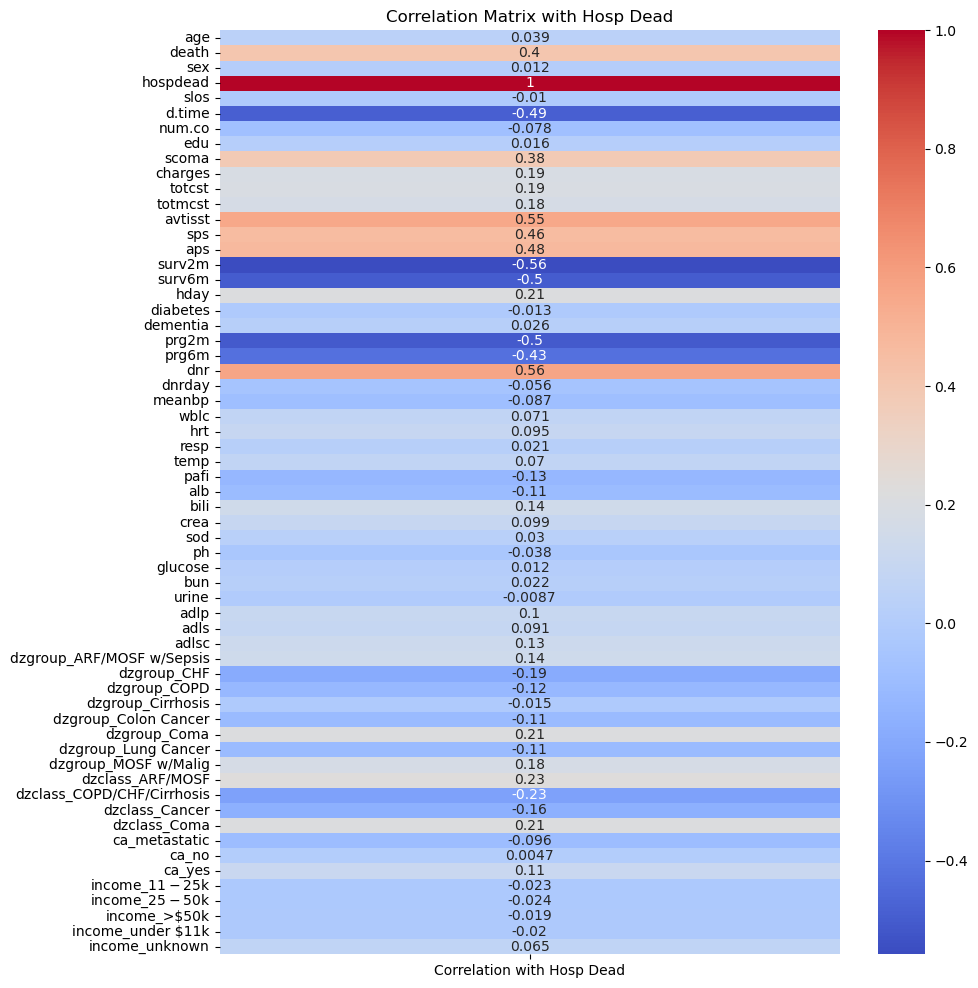

In [27]:
# Calculate correlation with 'charges'
correlation_charges = df.corrwith(df['charges']).to_frame()
correlation_charges.columns = ['Correlation with Charges']

# Calculate correlation with 'hosp_dead'
correlation_hosp_dead = df.corrwith(df['hospdead']).to_frame()
correlation_hosp_dead.columns = ['Correlation with Hosp Dead']

# Plotting the correlation matrix for 'charges'
plt.figure(figsize=(10, 12))
sns.heatmap(correlation_charges, annot=True, cmap='PiYG')
plt.title('Correlation Matrix with Charges')
plt.show()

# Plotting the correlation matrix for 'hosp_dead'
plt.figure(figsize=(10, 12))
sns.heatmap(correlation_hosp_dead, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Hosp Dead')
plt.show()

Plan:

edu        1634  - impute
charges     171  - drop missing values; since its a label for regression model
totcst      886, totmcst    3473  - take out features (0.8 correlation with charges) since its predictors of the same outcome, and I want to predict data based on illness characteristics

avtisst      81  - impute
prg2m      1648  - delete feature (patient survival estimation based on doctors opinion)
prg6m      1632  - delete feature (patient survival estimation based on doctors opinion)
dnrday       29  - day when dnr was signed - probably delte the feature
ph         2282  - impute mean
glucose    4499  - delete feature - too many missing values
adlp       5639  - delete feature 
adls       2867  - delete feature 


In [28]:
columns_to_drop = ['totcst','totmcst', 'prg2m', 'prg6m', 'glucose', 'adlp', 'adls']

df = df.drop(columns=columns_to_drop)
df.shape

(9103, 54)

In [29]:
df.isnull().sum()

age                              0
death                            0
sex                              0
hospdead                         0
slos                             0
d.time                           0
num.co                           0
edu                           1634
scoma                            0
charges                        171
avtisst                         81
sps                              0
aps                              0
surv2m                           0
surv6m                           0
hday                             0
diabetes                         0
dementia                         0
dnr                              0
dnrday                          29
meanbp                           0
wblc                             0
hrt                              0
resp                             0
temp                             0
pafi                             0
alb                              0
bili                             0
crea                

In [30]:
df['avtisst'].fillna(value=df['avtisst'].mean(), inplace=True)
#dnr day is not needed since we have dnr by itself, and dnrday is just specific of day when it was started
df = df.drop(columns='dnrday')
df['ph'].fillna(value=df['ph'].mean(), inplace=True)

# dropping rows with missing values (171)
df.dropna(subset=['charges'], inplace=True)


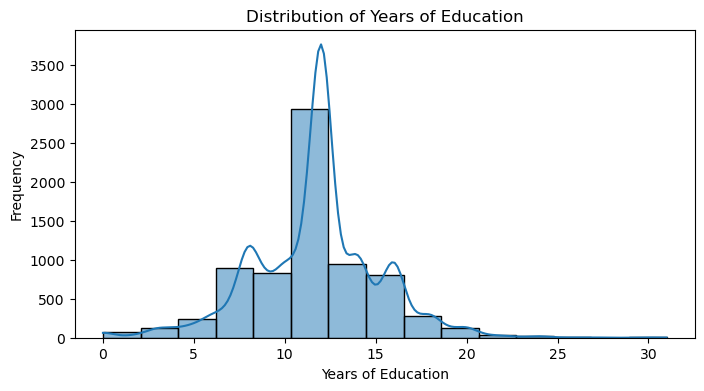

In [31]:
#the only column that left with missing values is edu (1634)

# Create a histogram to see distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['edu'], bins=15, kde=True) 
plt.title('Distribution of Years of Education')
plt.xlabel('Years of Education')
plt.ylabel('Frequency')
plt.show()


The data seems to be centered around a common value -> fill with mean

In [32]:
df['edu'].fillna(value=df['edu'].mean(), inplace=True)

In [41]:
missing_values = df.isnull().sum()

if missing_values.sum() == 0:
    print("The dataset does not have any missing values.")
else:
    print("The dataset has missing values.")
    print("Summary of missing values by column:")
    print(missing_values)

The dataset does not have any missing values.


 - dzgroup_ARF/MOSF w/Sepsis        
 - dzgroup_CHF                      
 - dzgroup_COPD                     
 - dzgroup_Cirrhosis                
 - dzgroup_Colon Cancer             
 - dzgroup_Coma                     
 - dzgroup_Lung Cancer              
 - dzgroup_MOSF w/Malig             
 - dzclass_ARF/MOSF                 
 - dzclass_COPD/CHF/Cirrhosis       
 - dzclass_Cancer                   
 - dzclass_Coma 

 These features might be redundant due to the fact that disease class is a part of a group. We need to test the hypothesis and exclude redundant features.

To analyze the correlation between the provided columns in your dataframe (df), and to determine which features might be redundant, we can conduct a pairwise correlation analysis. Given that these features are categorical, we would typically use a measure like Cramer's V, which is suitable for categorical data, instead of Pearson's correlation coefficient, which is for continuous data.
The process involves computing the Chi-square statistic from a contingency table of each pair of variables and then calculating Cramer's V based on this statistic.

In [33]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """ Calculate Cramer's V statistic for categorial-categorial association. """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

# List of features for analysis
features = [
    'dzgroup_ARF/MOSF w/Sepsis', 'dzgroup_CHF', 'dzgroup_COPD', 
    'dzgroup_Cirrhosis', 'dzgroup_Colon Cancer', 'dzgroup_Coma', 
    'dzgroup_Lung Cancer', 'dzgroup_MOSF w/Malig', 'dzclass_ARF/MOSF', 
    'dzclass_COPD/CHF/Cirrhosis', 'dzclass_Cancer', 'dzclass_Coma'
]

# Initialize a DataFrame to store Cramer's V results
cramers_results = pd.DataFrame(index=features, columns=features)

# Calculate Cramer's V for each pair of features
for f1 in features:
    for f2 in features:
        cramers_results.loc[f1, f2] = cramers_v(df[f1], df[f2])

# Display the results
cramers_results


,dzgroup_ARF/MOSF w/Sepsis,dzgroup_CHF,dzgroup_COPD,dzgroup_Cirrhosis,dzgroup_Colon Cancer,dzgroup_Coma,dzgroup_Lung Cancer,dzgroup_MOSF w/Malig,dzclass_ARF/MOSF,dzclass_COPD/CHF/Cirrhosis,dzclass_Cancer,dzclass_Coma
dzgroup_ARF/MOSF w/Sepsis,0.999763,0.335588,0.272661,0.191803,0.191803,0.208396,0.262448,0.228398,0.852262,0.53699,0.33906,0.208396
dzgroup_CHF,0.335588,0.999569,0.146547,0.1027,0.1027,0.111713,0.141017,0.122565,0.393763,0.62505,0.182472,0.111713
dzgroup_COPD,0.272661,0.146547,0.999414,0.083031,0.083031,0.090394,0.114302,0.099253,0.319972,0.50803,0.148076,0.090394
dzgroup_Cirrhosis,0.191803,0.1027,0.083031,0.998945,0.057532,0.062798,0.079828,0.069119,0.225178,0.357762,0.103783,0.062798
dzgroup_Colon Cancer,0.191803,0.1027,0.083031,0.057532,0.998945,0.062798,0.079828,0.069119,0.225178,0.165292,0.566482,0.062798
dzgroup_Coma,0.208396,0.111713,0.090394,0.062798,0.062798,0.999087,0.086924,0.075329,0.244628,0.17962,0.112887,0.999087
dzgroup_Lung Cancer,0.262448,0.141017,0.114302,0.079828,0.079828,0.086924,0.999378,0.095461,0.307997,0.226283,0.774163,0.086924
dzgroup_MOSF w/Malig,0.228398,0.122565,0.099253,0.069119,0.069119,0.075329,0.095461,0.999219,0.312955,0.196889,0.123849,0.075329
dzclass_ARF/MOSF,0.852262,0.393763,0.319972,0.225178,0.225178,0.244628,0.307997,0.312955,0.999775,0.629974,0.397835,0.244628
dzclass_COPD/CHF/Cirrhosis,0.53699,0.62505,0.50803,0.357762,0.165292,0.17962,0.226283,0.196889,0.629974,0.999741,0.292402,0.17962


Now we want to see the most correlated features in pairs.

In [34]:
def find_most_correlated_pair(cramers_results, target_feature):
    """ Find the most correlated feature pair for the given target feature. """
    correlations = cramers_results[target_feature].drop(target_feature)  # Drop the correlation of the feature with itself
    most_correlated_feature = correlations.idxmax()  # Find the feature with the maximum correlation
    max_correlation = correlations.max()  # Get the maximum correlation value
    return most_correlated_feature, max_correlation

# List of features for analysis
features = [
    'dzgroup_ARF/MOSF w/Sepsis', 'dzgroup_CHF', 'dzgroup_COPD', 
    'dzgroup_Cirrhosis', 'dzgroup_Colon Cancer', 'dzgroup_Coma', 
    'dzgroup_Lung Cancer', 'dzgroup_MOSF w/Malig', 'dzclass_ARF/MOSF', 
    'dzclass_COPD/CHF/Cirrhosis', 'dzclass_Cancer', 'dzclass_Coma'
]

# Find and print the most correlated pairs for each feature
for feature in features:
    most_correlated_feature, max_correlation = find_most_correlated_pair(cramers_results, feature)
    print(f"The most correlated feature to {feature} is {most_correlated_feature} with a Cramer's V of {max_correlation:.4f}")


The most correlated feature to dzgroup_ARF/MOSF w/Sepsis is dzclass_ARF/MOSF with a Cramer's V of 0.8523
The most correlated feature to dzgroup_CHF is dzclass_COPD/CHF/Cirrhosis with a Cramer's V of 0.6250
The most correlated feature to dzgroup_COPD is dzclass_COPD/CHF/Cirrhosis with a Cramer's V of 0.5080
The most correlated feature to dzgroup_Cirrhosis is dzclass_COPD/CHF/Cirrhosis with a Cramer's V of 0.3578
The most correlated feature to dzgroup_Colon Cancer is dzclass_Cancer with a Cramer's V of 0.5665
The most correlated feature to dzgroup_Coma is dzclass_Coma with a Cramer's V of 0.9991
The most correlated feature to dzgroup_Lung Cancer is dzclass_Cancer with a Cramer's V of 0.7742
The most correlated feature to dzgroup_MOSF w/Malig is dzclass_ARF/MOSF with a Cramer's V of 0.3130
The most correlated feature to dzclass_ARF/MOSF is dzgroup_ARF/MOSF w/Sepsis with a Cramer's V of 0.8523
The most correlated feature to dzclass_COPD/CHF/Cirrhosis is dzclass_ARF/MOSF with a Cramer's V o

In [35]:
#dropping classes columns since they are very correlated with groups

features_to_drop = ['dzclass_ARF/MOSF', 
    'dzclass_COPD/CHF/Cirrhosis', 'dzclass_Cancer', 'dzclass_Coma']

df = df.drop(columns=features_to_drop)

Notes to handle outliers down the road: z-score (mass should be less then 3) and IQR

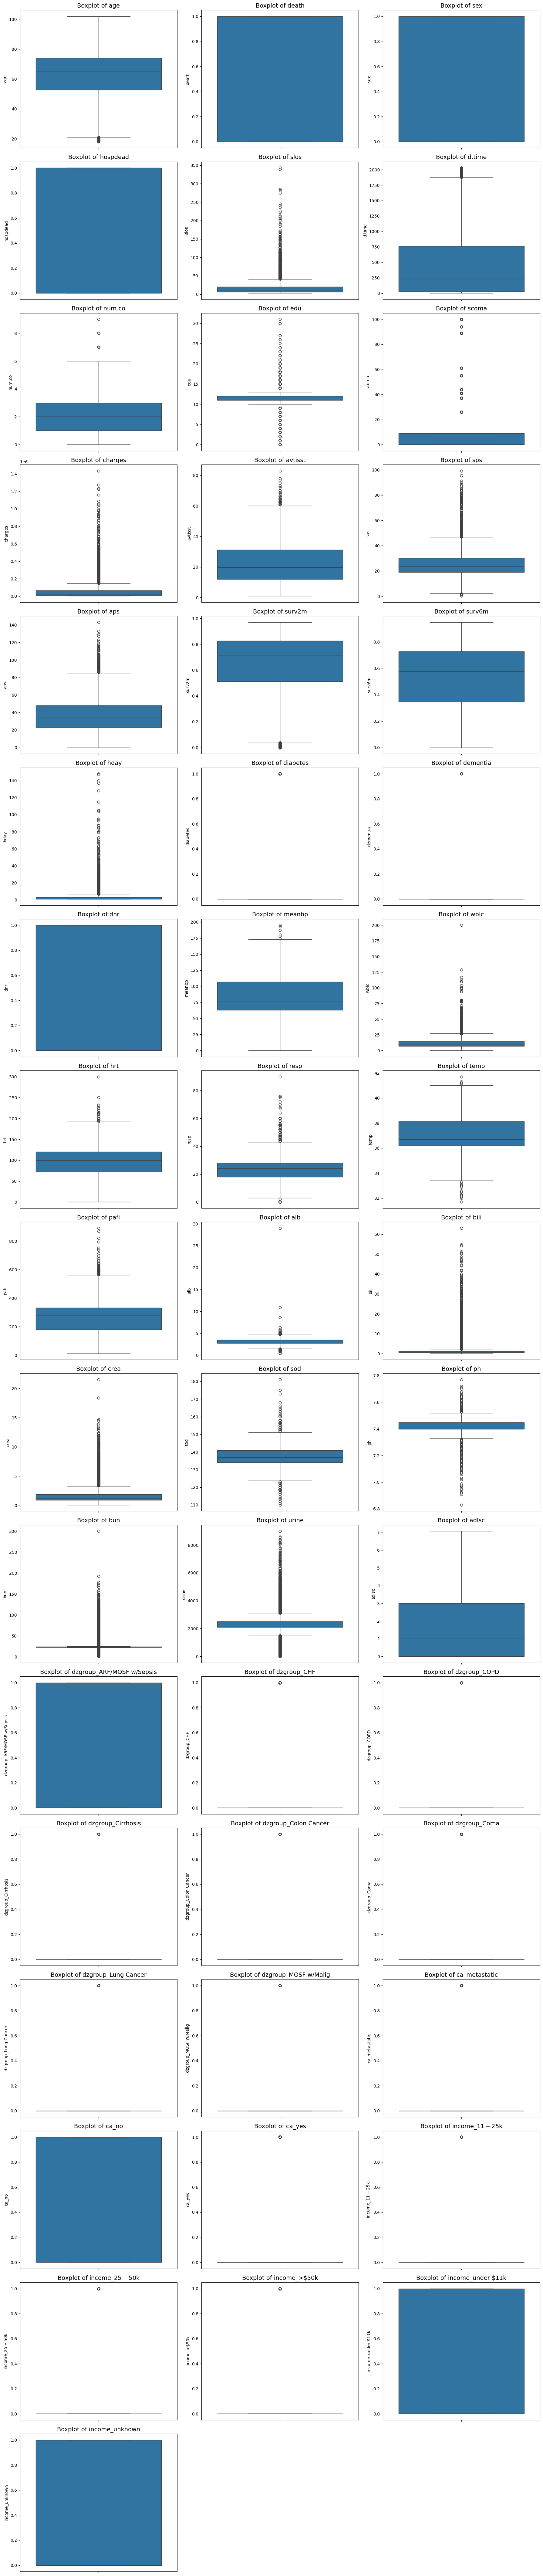

{'age': [39,
  165,
  178,
  192,
  276,
  316,
  427,
  550,
  600,
  608,
  675,
  865,
  1027,
  1158,
  1524,
  1554,
  1858,
  2326,
  2634,
  2808,
  2914,
  3276,
  3589,
  3941,
  4069,
  4438,
  4544,
  4548,
  4622,
  4974,
  4999,
  5194,
  5203,
  5554,
  5624,
  5629,
  5852,
  5932,
  6012,
  6028,
  6171,
  6201,
  6843,
  6977,
  7539,
  8024,
  8083,
  8484,
  8551,
  8770,
  9086,
  9095],
 'death': [],
 'sex': [],
 'hospdead': [],
 'slos': [15,
  23,
  30,
  63,
  73,
  74,
  80,
  82,
  89,
  96,
  122,
  136,
  177,
  178,
  190,
  192,
  197,
  204,
  214,
  218,
  241,
  261,
  277,
  300,
  301,
  302,
  308,
  315,
  319,
  324,
  325,
  329,
  339,
  343,
  359,
  386,
  399,
  416,
  444,
  449,
  491,
  520,
  528,
  529,
  541,
  553,
  557,
  562,
  566,
  567,
  584,
  589,
  611,
  612,
  632,
  645,
  650,
  656,
  685,
  689,
  722,
  737,
  749,
  759,
  763,
  775,
  778,
  779,
  780,
  786,
  796,
  819,
  829,
  849,
  851,
  859,
  865,
  867,
  

In [36]:


def detect_and_plot_outliers(df):
    # Creating a dictionary to store outlier data
    outlier_indices = {}

    # Iterate over each column
    for column in df.select_dtypes(include=[np.number]).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        # Calculate the IQR (Interquartile Range)
        IQR = Q3 - Q1
        # Define bounds for what is considered an outlier
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Find the outliers in the DataFrame
        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_indices[column] = column_outliers.index.tolist()
        

    # Plot boxplots for all numerical columns
    num_columns = df.select_dtypes(include=[np.number]).columns
    n_cols = 3  # Number of columns in the subplot grid
    n_rows = int(np.ceil(len(num_columns) / n_cols))  # Number of rows in the subplot grid
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
    
    # Flatten the axes array for easy indexing
    axs = axs.flatten()
    
    for i, column in enumerate(num_columns):
        sns.boxplot(y=df[column], ax=axs[i])
        axs[i].set_title(f'Boxplot of {column}', fontsize=14)
    
    # Remove any unused subplots
    for i in range(len(num_columns), len(axs)):
        fig.delaxes(axs[i])

    plt.tight_layout()
    plt.show()

    return outlier_indices


outlier_data = detect_and_plot_outliers(df)
outlier_data


In [42]:
import pandas as pd
from scipy.stats.mstats import winsorize

#values below the 5th percentile are replaced with the 5th percentile value,
# and those above the 95th percentile are replaced with the 95th percentile value.

#all column except future labels
exclude_columns = ['charges', 'hospdead']

"""#but also excluding binary columns
for col in df.columns:
    # Exclude specified columns and binary columns
    if col not in exclude_columns and len(df[col].unique()) > 2:
        df[col] = winsorize(df[col], limits=[0.05, 0.05])"""


for col in df.columns:
    if col not in exclude_columns and len(df[col].unique()) > 2:
        # Convert to a regular array, if it's a masked array
        regular_array = np.array(df[col])
        df[col] = winsorize(regular_array, limits=[0.05, 0.05])


# Check the effect of winsorizing on the DataFrame
print("DataFrame after Winsorizing:")
print(df.describe())

DataFrame after Winsorizing:
               age        death          sex     hospdead         slos  \
count  8932.000000  8932.000000  8932.000000  8932.000000  8932.000000   
mean     62.805672     0.681482     0.436408     0.257389    15.910322   
std      14.488641     0.465928     0.495967     0.437220    13.498525   
min      33.530000     0.000000     0.000000     0.000000     4.000000   
25%      52.805235     0.000000     0.000000     0.000000     6.000000   
50%      64.871980     1.000000     0.000000     0.000000    11.000000   
75%      74.059708     1.000000     1.000000     1.000000    20.000000   
max      85.127990     1.000000     1.000000     1.000000    54.000000   

            d.time       num.co          edu        scoma       charges  \
count  8932.000000  8932.000000  8932.000000  8932.000000  8.932000e+03   
mean    472.601657     1.815495    11.787810    10.155956  5.999215e+04   
std     543.112493     1.204902     2.548397    18.883100  1.026539e+05   
min 

/Users/admin/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/admin/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/admin/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/admin/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/admin/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/admin/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning

In [38]:
df.to_csv('cleaned_df.csv')